#📌 Extracción

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_json('https://raw.githubusercontent.com/abiquintana/TelecomX/refs/heads/main/TelecomX_Data.json')

In [33]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

##2.1 Comprobación de incoherencias en los datos

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [35]:
#NORMALIZACIÓN

df = df.join(pd.json_normalize(df['customer']))
df = df.join(pd.json_normalize(df['phone']))
df = df.join(pd.json_normalize(df['internet']))
df = df.join(pd.json_normalize(df['account']))


In [36]:
#Elimaciónde columnas originales

df = df.drop(columns=['customer','phone','internet','account'])


In [37]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##2.2 Manejo de inconsistencias

In [38]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [40]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [41]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print('---------------------')


customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
---------------------
Churn
['No' 'Yes' '']
---------------------
gender
['Female' 'Male']
---------------------
Partner
['Yes' 'No']
---------------------
Dependents
['Yes' 'No']
---------------------
PhoneService
['Yes' 'No']
---------------------
MultipleLines
['No' 'Yes' 'No phone service']
---------------------
InternetService
['DSL' 'Fiber optic' 'No']
---------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
---------------------
OnlineBackup
['Yes' 'No' 'No internet service']
---------------------
DeviceProtection
['No' 'Yes' 'No internet service']
---------------------
TechSupport
['Yes' 'No' 'No internet service']
---------------------
StreamingTV
['Yes' 'No' 'No internet service']
---------------------
StreamingMovies
['No' 'Yes' 'No internet service']
---------------------
Contract
['One year' 'Month-to-month' 'Two year']
---------------------
PaperlessBilling
['Yes

In [42]:
#REPLAZO DE ESPACIOS VACIOS

df['Churn'] = df['Churn'].replace('',np.nan) #convierte el espacio vacio a NaN
df['Churn'] = df['Churn'].fillna('No')#NaN a No

In [43]:
df['Charges.Total'].isna().sum()

np.int64(0)

In [44]:
#REMPLAZO DE ESPACIOS EN BLANCO

df['Charges.Total']=df['Charges.Total'].replace(' ',np.nan)

In [45]:
df['Charges.Total'].isna().sum()

np.int64(11)

In [46]:
df['Charges.Total'] = df['Charges.Total'].fillna('0')

In [47]:
#CAMBIO DE STRING A FLOAT
df['Charges.Total'] = df['Charges.Total'].astype(float)

In [48]:
df['Charges.Total'].dtypes

dtype('float64')

In [49]:
#CREANDO COLUMNA

df['Cuentas_Diarias'] = df['Charges.Monthly']/30

In [50]:
df[['Charges.Monthly','Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


##2.3 Estandarización y transformación de datos

In [51]:
#

col_binarias=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

df[col_binarias] = df[col_binarias].replace({'Yes':1 ,'No':0})

/tmp/ipython-input-3328868961.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col_binarias] = df[col_binarias].replace({'Yes':1 ,'No':0})


In [52]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [53]:
df = df.rename(columns={
    'customerID':'id_cliente',
    'Churn':'baja_servicio',
    'gender':'genero',
    'SeniorCitizen':'personas_tercera_edad',
    'Partner':'tiene_pareja',
    'Dependents':'hijos',
    'tenure':'permanencia_mensual',
    'PhoneService':'servicio_telefonico',
    'MultipleLines':'multiples_líneas',
    'InternetService':'servicio_internet',
    'OnlineSecurity':'seguridad_online',
    'OnlineBackup':'respaldo_online',
    'DeviceProtection':'proteccion_dispositivo',
    'TechSupport':'soporte_tecnico',
    'StreamingTV':'tv_streaming',
    'StreamingMovies':'peliculas_streaming',
    'Contract':'tipo_de_contrato',
    'PaperlessBilling':'facturacion_sin_papel',
    'PaymentMethod':'metodo_pago',
    'Charges.Monthly':'cargo_mensual',
    'Charges.Total':'cargo_total',
    'Cuentas_Diarias':'cargo_diario',

})


In [54]:
df

,id_cliente,baja_servicio,genero,personas_tercera_edad,tiene_pareja,hijos,permanencia_mensual,servicio_telefonico,multiples_líneas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_de_contrato,facturacion_sin_papel,metodo_pago,cargo_mensual,cargo_total,cargo_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

## 3.1 Análisis Descriptivo

In [55]:
df.describe()

,baja_servicio,personas_tercera_edad,tiene_pareja,hijos,permanencia_mensual,servicio_telefonico,facturacion_sin_papel,cargo_mensual,cargo_total,cargo_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Total de clientes: 7267

Cancelaciones/bajas: 25,7%

Clientes de la tercera edad: 16%

Clientes con pareja: 48%

Clientes con hijos: 30%

Permanencia mensual: 32 meses promedio /  72 meses máximo

Cargo mensual: $64.7

Cargo diario: $2.15

Cargo Total promedio: $2277.18

Cargo Total máximo: $8684.8
               
                  

##3.2 Distribución de evasión

In [56]:
bajas=df['baja_servicio'].value_counts(normalize=True).rename(index={1:'Si',0:'No'})*100
bajas

,proportion
baja_servicio,
No,74.280996
Si,25.719004


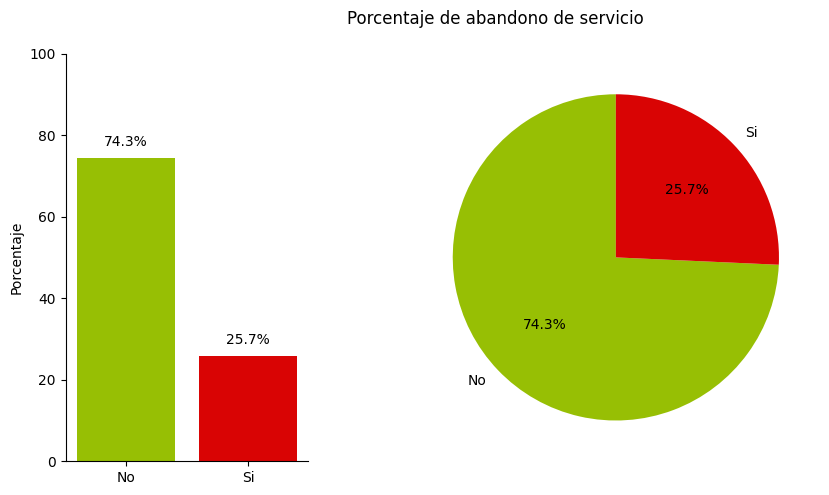

In [57]:
colores=['#97BF04','#D90404']


fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios':[1,3]} )

fig.suptitle('Porcentaje de abandono de servicio')

axs[0].bar(bajas.index, bajas.values,color=colores)
axs[0].set_ylabel('Porcentaje')
axs[0].set_xlabel('')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

for i, valor in enumerate(bajas.values):
    axs[0].text(i, valor + 3, f'{valor:.1f}%', ha='center', fontsize=10)


axs[0].set_ylim(0,100)



axs[1].pie(
    bajas.values,              # porcentajes
    labels=bajas.index,        # etiquetas: Si / No
    autopct='%1.1f%%',         # mostrar % dentro
    colors=colores,
    startangle=90              # gira la torta para que quede bonita
)

plt.tight_layout()

plt.show()

## 3.3 Recuento de evasión por variables categóricas

In [58]:
df.columns

Index(['id_cliente', 'baja_servicio', 'genero', 'personas_tercera_edad',
       'tiene_pareja', 'hijos', 'permanencia_mensual', 'servicio_telefonico',
       'multiples_líneas', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_de_contrato',
       'facturacion_sin_papel', 'metodo_pago', 'cargo_mensual', 'cargo_total',
       'cargo_diario'],
      dtype='object')

In [59]:
tipo_contrato=df.groupby('tipo_de_contrato')['baja_servicio'].value_counts(normalize=True).mul(100).rename(index={1:'Yes',0:'No'}).unstack()
tipo_contrato.columns.name=None
tipo_contrato.index.name='Tipo de Contrato'
tipo_contrato

,No,Yes
Tipo de Contrato,,
Month-to-month,58.676654,41.323346
One year,89.071758,10.928242
Two year,97.246127,2.753873


In [60]:
internet=df.groupby('servicio_internet')['baja_servicio'].value_counts(normalize=True).mul(100).rename(index={1:'Yes',0:'No'}).unstack()
internet.columns.name=None
internet.index.name='Servicio de Internet'
internet

,No,Yes
Servicio de Internet,,
DSL,81.551447,18.448553
Fiber optic,59.443402,40.556598
No,92.852625,7.147375


In [61]:
pago=df.groupby('metodo_pago')['baja_servicio'].value_counts(normalize=True).mul(100).rename(index={1:'Yes',0:'No'}).unstack()
pago.columns.name=None
pago.index.name='Método de Pago'
pago

,No,Yes
Método de Pago,,
Bank transfer (automatic),83.763373,16.236627
Credit card (automatic),85.204082,14.795918
Electronic check,56.196319,43.803681
Mailed check,81.501502,18.498498


In [62]:
tercera_edad=df.groupby('personas_tercera_edad')['baja_servicio'].value_counts(normalize=True).mul(100).rename(index={1:'Yes',0:'No'}).unstack()
tercera_edad.columns.name=None
tercera_edad.index.name='Clientes de la Tercera Edad'
tercera_edad

,No,Yes
Clientes de la Tercera Edad,,
No,77.107642,22.892358
Yes,59.729272,40.270728


In [63]:
pareja=df.groupby('tiene_pareja')['baja_servicio'].value_counts(normalize=True).mul(100).rename(index={1:'Yes',0:'No'}).unstack()
pareja.columns.name=None
pareja.index.name='Clientes con pareja'
pareja

,No,Yes
Clientes con pareja,,
No,67.991464,32.008536
Yes,80.983513,19.016487


In [64]:
hijos=df.groupby('hijos')['baja_servicio'].value_counts(normalize=True).mul(100).rename(index={1:'Yes',0:'No'}).unstack()
hijos.columns.name=None
hijos.index.name='Clientes hijos'
hijos

,No,Yes
Clientes hijos,,
No,69.661817,30.338183
Yes,85.052728,14.947272


In [65]:
genero=df.groupby('genero')['baja_servicio'].value_counts(normalize=True).mul(100).rename(index={1:'Yes',0:'No'}).unstack()
genero.columns.name=None
genero.index.name='Genero'
genero

,No,Yes
Genero,,
Female,73.858575,26.141425
Male,74.693878,25.306122


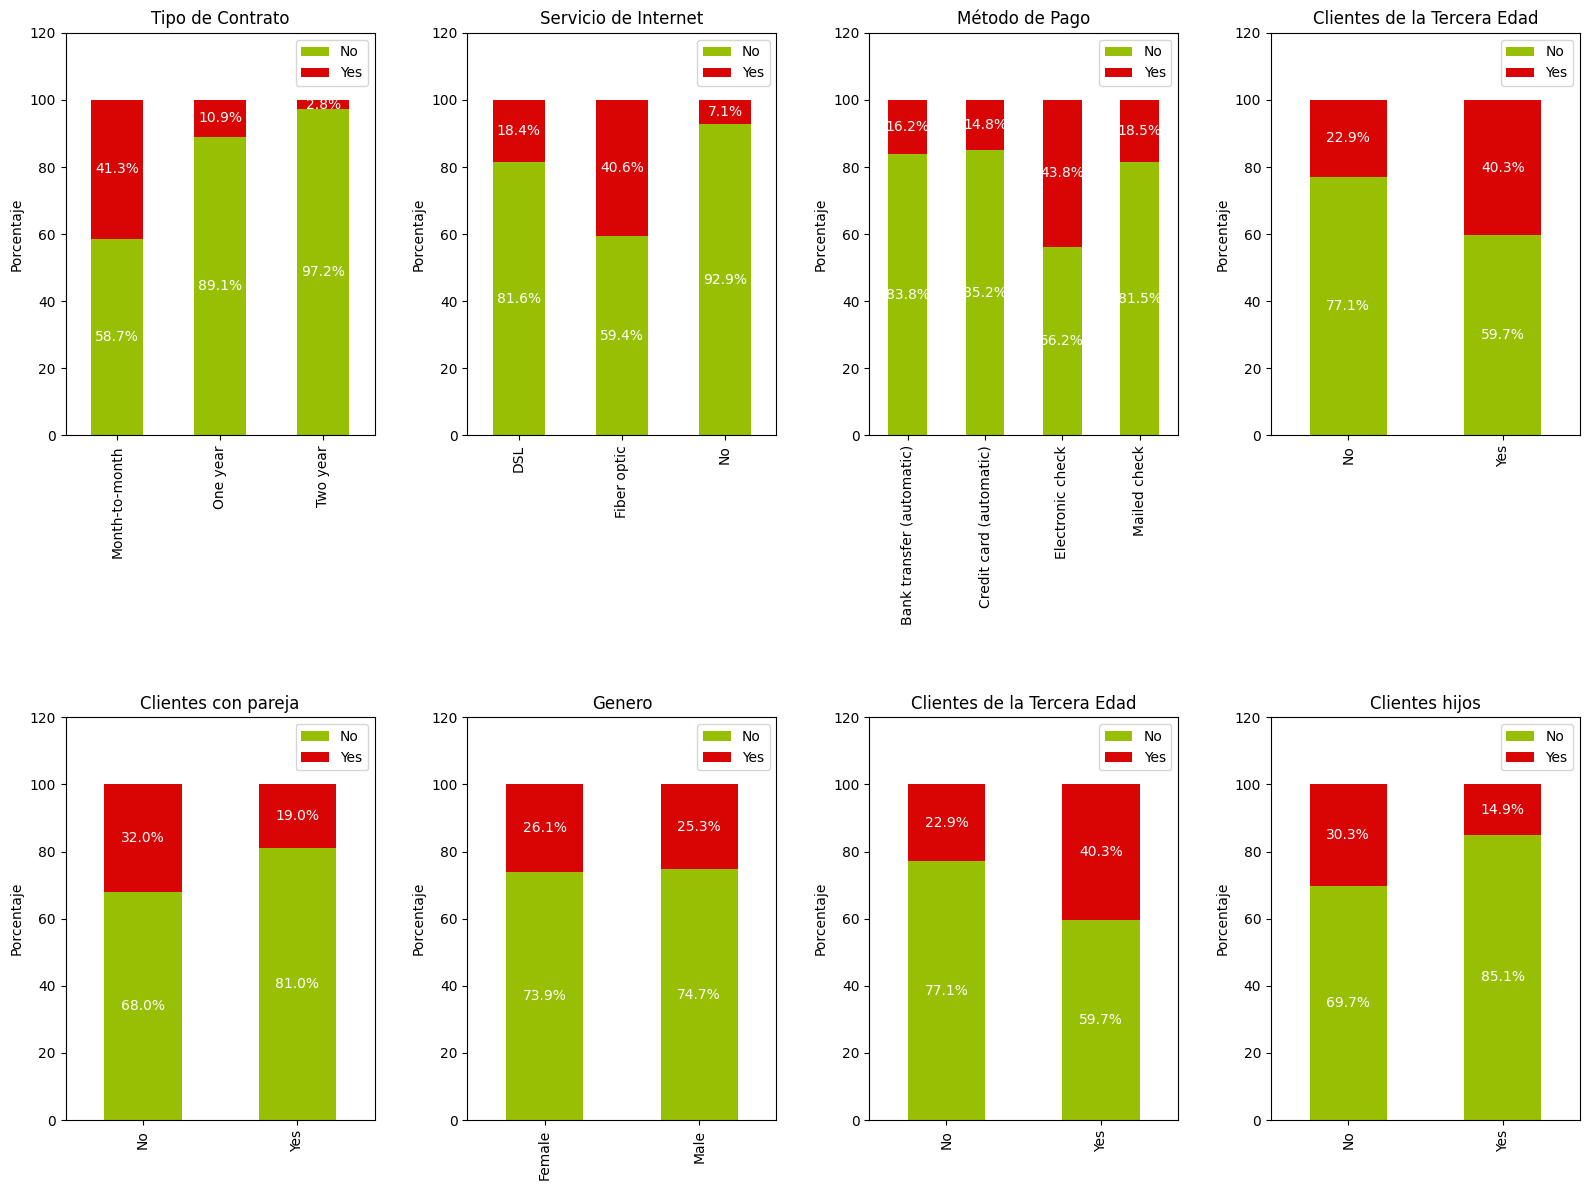

In [66]:
lista=[tipo_contrato,internet,pago,tercera_edad,pareja,genero,tercera_edad,hijos]
fig, axs = plt.subplots(2,4,figsize=(16,12))
axs = axs.flatten()

for i,categoria in enumerate(lista):
  categoria.plot(
    kind='bar',
    stacked=True,
    ax=axs[i],
    color=colores
)


  axs[i].set_title(categoria.index.name)
  axs[i].set_ylabel('Porcentaje')
  axs[i].set_xlabel('')

  axs[i].legend(loc='upper right')

  for container in axs[i].containers:
     axs[i].bar_label(container, fmt='%.1f%%', label_type='center',color='white')


  #axs[i].set_ylim(0,125)
  axs[i].set_yticks(range(0,140,20))
  #axs[i].margins(y=0.25)

plt.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.3)

plt.show()

**Mayor Riesgo de Abandono**



1.   Contrato Mensual: 41.3%
2.   Pago Electrónico: 43.8%
3.   Fibra Óptica: 40.6%
4.   Personas de la Tercera Edad: 40.3%



##3.4 Conteo de evasión por variables numéricas

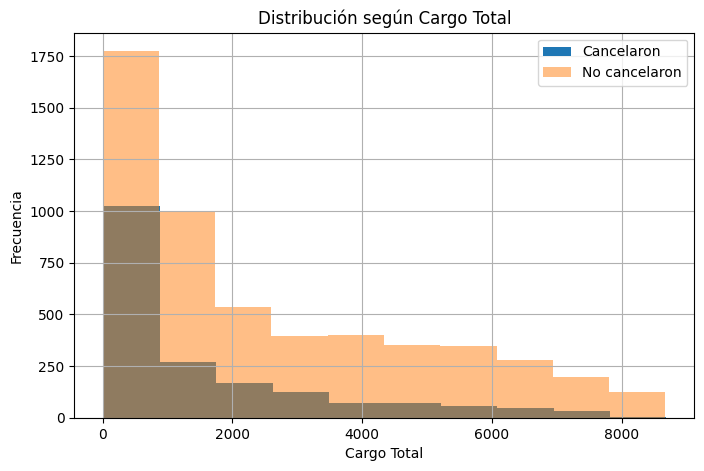

In [74]:

plt.figure(figsize=(8,5))

df[df['baja_servicio']==1]['cargo_total'].hist(alpha=1, label='Cancelaron')
df[df['baja_servicio']==0]['cargo_total'].hist(alpha=0.5, label='No cancelaron')

plt.legend()
plt.xlabel('Cargo Total')
plt.ylabel('Frecuencia')
plt.title('Distribución según Cargo Total')
plt.show()


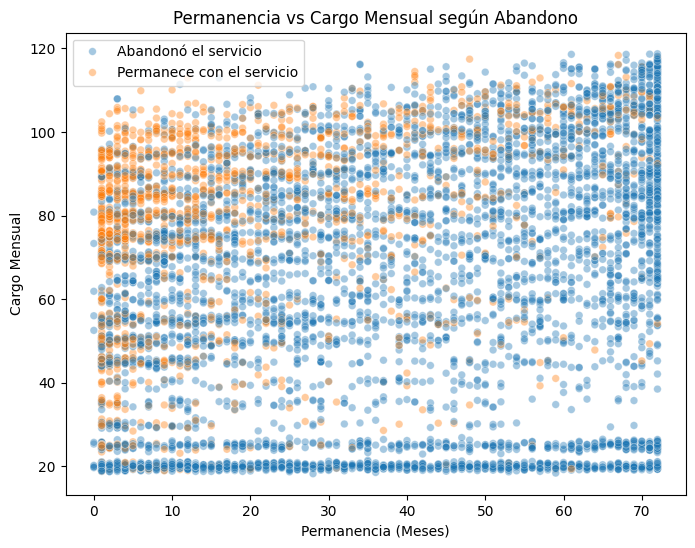

In [83]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='permanencia_mensual',
    y='cargo_mensual',
    hue='baja_servicio',
    alpha=0.4,
    s=30
)

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=['Abandonó el servicio','Permanece con el servicio'])

plt.xlabel('Permanencia (Meses)')
plt.ylabel('Cargo Mensual')
plt.title('Permanencia vs Cargo Mensual según Abandono')

plt.show()

El abandono del servicio está principalmente asociado con:

Baja permanencia (clientes nuevos)

En muchos casos, cargos mensuales más elevados

Mientras que los clientes con mayor antigüedad presentan una menor tasa de abandono, lo que sugiere que la retención mejora con el tiempo.

#📄Informe final

##1.Introducción

Telecom X enfrenta actualmente una elevada tasa de cancelación de servicios, lo que representa un impacto directo en sus ingresos y en la estabilidad de su cartera de clientes. Ante esta situación, resulta fundamental comprender los factores que influyen en la decisión de los clientes de abandonar el servicio.

El presente análisis tiene como objetivo recopilar, procesar y examinar los datos disponibles mediante el uso de Python y sus principales bibliotecas de análisis de datos. A través de técnicas de exploración, visualización y análisis descriptivo, se busca identificar patrones, tendencias y variables que estén asociadas con la evasión de clientes.

Este informe presenta el proceso analítico realizado y los principales insights identificados a partir de los datos.

##2.Limpieza y tratamiento de Datos

La base de datos utilizada para el análisis fue extraída en formato JSON, lo que implicó un proceso inicial de transformación y estructuración antes de poder trabajar con ella adecuadamente.

Para preparar la información y dejarla lista para el análisis exploratorio, se realizaron los siguientes pasos:

🔹 Normalización de estructuras anidadas

En una primera instancia, se normalizaron las columnas que contenían diccionarios anidados, expandiendo su contenido en nuevas columnas independientes. Esto permitió trabajar con un formato tabular tradicional adecuado para análisis en Python.

🔹 Detección y tratamiento de valores nulos

Posteriormente, se verificó la existencia de datos vacíos o nulos en el conjunto de datos. Se identificaron inconsistencias principalmente en las columnas relacionadas con:

Churn (baja del servicio)

Cargo Total

Estos valores fueron tratados adecuadamente para evitar sesgos o errores en los cálculos posteriores.

🔹 Corrección de tipos de datos

Se detectó que la variable Cargo Total se encontraba almacenada como tipo string.
Para permitir cálculos numéricos correctos, se realizó su conversión al tipo float.

🔹 Codificación de variables categóricas

Algunas variables categóricas fueron transformadas a valores binarios (por ejemplo, 0 y 1) con el objetivo de:

Facilitar cálculos estadísticos

Permitir futuras aplicaciones de modelos predictivos

Simplificar el análisis comparativo

🔹 Renombramiento de columnas

Finalmente, se modificaron los nombres de las columnas para mejorar su comprensión, estandarización y claridad durante el análisis.

##3.Análisis exploratorio de Datos

###Análisis descriptivo

A partir del análisis descriptivo de la base de datos, se calcularon medidas estadísticas como media, desviación estándar, valores mínimos y máximos, así como percentiles (25%, 50%, 75%). Esto permitió obtener una visión general del comportamiento de los clientes.

Los principales resultados fueron:

Total de clientes: 7.267

Tasa de cancelación (Churn): 25,7%

Clientes de la tercera edad: 16%

Clientes con pareja: 48%

Clientes con hijos: 30%


Permanencia mensual promedio: 32 meses

Permanencia máxima: 72 meses

Cargo mensual promedio: $64,7

Cargo diario promedio: $2,15

Cargo total promedio: $2.277,18

Cargo total máximo: $8.684,8

Estos valores permiten comprender el perfil general del cliente promedio de Telecom X y establecer una base para comparar comportamientos entre clientes que abandonan y los que permanecen.

###Distribución de Evasión

Se calculó el porcentaje de abandono sobre el total de clientes, obteniendo una tasa de 25,7%.

Esto implica que aproximadamente 1 de cada 4 clientes cancela el servicio, lo que representa un nivel de churn considerable y potencialmente crítico para la estabilidad financiera de la empresa.

Desde una perspectiva estratégica, este nivel de evasión sugiere la necesidad de implementar medidas de retención focalizadas.

###Recuento de Evasión por Variables Categóricas


Se analizó la relación entre distintas variables categóricas y la tasa de abandono, con el objetivo de identificar segmentos con mayor riesgo.

Los resultados más relevantes fueron los siguientes:

**Mayor Riesgo de Abandono**

Contrato Mensual: 41,3%

Pago Electrónico: 43,8%

Fibra Óptica: 40,6%

Clientes de la Tercera Edad: 40,3%

###Conteo de evasión por variables numéricas

Del análisis realizado se desprende que el abandono del servicio está principalmente vinculado a los siguientes factores:

🔹 Baja permanencia

Los clientes con menor antigüedad presentan una mayor probabilidad de cancelar el servicio. Esto indica que el riesgo de abandono es más alto en las primeras etapas de la relación comercial.

🔹 Cargos mensuales más elevados

Se observa que, en muchos casos, los clientes con cargos mensuales superiores al promedio muestran una mayor tendencia a abandonar el servicio, lo que podría estar relacionado con la percepción de alto costo o menor relación valor-precio.

Por otro lado:

🔹 Mayor antigüedad como factor de estabilidad

Los clientes con mayor permanencia presentan una tasa de abandono considerablemente menor. Esto sugiere que, a medida que el cliente permanece más tiempo en la empresa, aumenta su nivel de fidelización y disminuye la probabilidad de cancelación.

##4.Conclusiones e Insights

###Conclusiones principales

La tasa general de abandono es significativa (25,7%), lo que implica que aproximadamente uno de cada cuatro clientes cancela el servicio. Este nivel de churn representa un riesgo importante para la estabilidad y crecimiento del negocio.

El abandono se concentra en clientes con baja permanencia.
La mayor probabilidad de cancelación ocurre durante los primeros meses de contrato, lo que indica que la etapa inicial de la relación con el cliente es crítica.

Los contratos mensuales presentan mayor vulnerabilidad.
Los clientes con contrato mensual muestran una tasa de abandono considerablemente superior al promedio general, evidenciando menor nivel de fidelización en comparación con contratos anuales o bianuales.

El costo del servicio influye en la evasión.
Se observa una mayor tendencia al abandono en clientes con cargos mensuales más elevados, lo que sugiere que el precio puede ser un factor determinante en la decisión de cancelación.

Determinados segmentos presentan mayor riesgo.
Clientes de la tercera edad, usuarios de fibra óptica y quienes utilizan pago electrónico presentan tasas de abandono superiores al promedio.

###Insights

1. El momento crítico es el inicio de la relación

El mayor riesgo de churn ocurre en los primeros meses. Esto sugiere que la empresa debe reforzar estrategias de acompañamiento y fidelización temprana.

2. La fidelización contractual reduce el abandono

Los contratos de mayor duración funcionan como mecanismo de retención natural. Incentivar planes anuales podría disminuir significativamente la tasa de evasión.

3. La percepción de valor es determinante

Clientes con cargos mensuales elevados muestran mayor propensión a cancelar, lo que indica que la percepción costo-beneficio juega un rol clave en la decisión de permanencia.

4. El churn no es aleatorio

El abandono no ocurre de manera uniforme, sino que se concentra en segmentos específicos, lo que permite diseñar estrategias de retención segmentadas.

##5.Recomendaciones

En base a los resultados obtenidos, se proponen las siguientes acciones para reducir la tasa de abandono:


1. Fortalecer la fidelización en los primeros meses, ya que el mayor riesgo de cancelación se concentra en clientes nuevos.

2. Incentivar contratos de mayor duración, promoviendo beneficios para quienes migren desde planes mensuales.

3. Revisar la estructura de precios y la percepción de valor, especialmente en planes con cargos mensuales más elevados.

4. Aplicar estrategias segmentadas en grupos con mayor riesgo (tercera edad, fibra óptica, pago electrónico).

5. Desarrollar modelos predictivos de churn para anticipar cancelaciones y actuar de manera preventiva.

##